# DA- Visualization with Matplotlib and Seaborn

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv(r"C:\Users\GS INFO\Downloads\U.S.Death.csv")

In [4]:
df.head(5)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


In [5]:
plt.style.use("dark_background")     
sns.set_palette("icefire")           

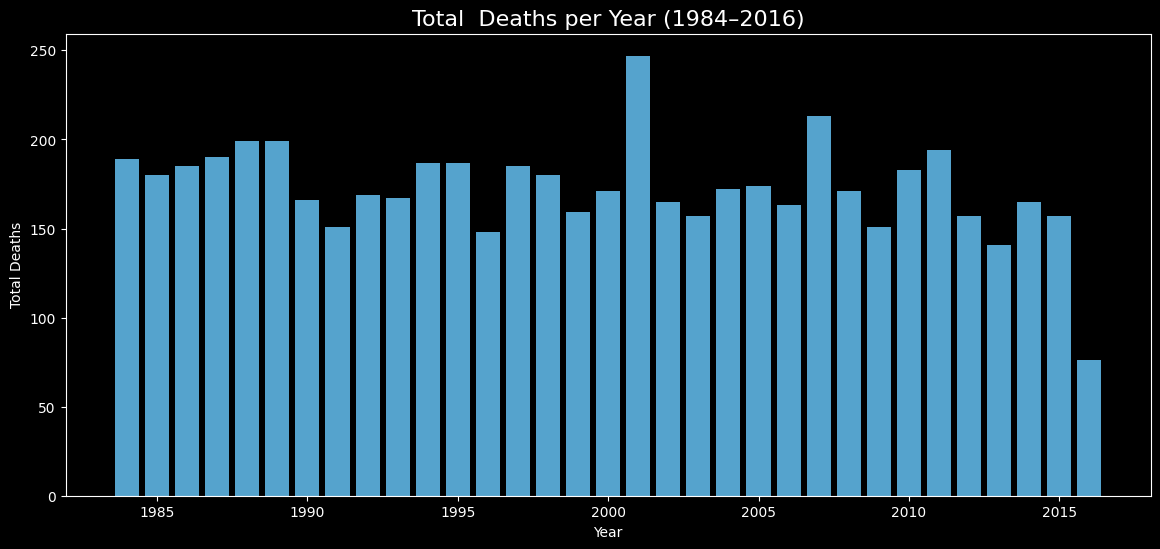

In [7]:
df_year = df[(df["year"] >= 1984) & (df["year"] <= 2016)]
yearly_deaths = df_year.groupby("year").size()

plt.figure(figsize=(14,6))
plt.bar(yearly_deaths.index, yearly_deaths.values)

plt.title("Total  Deaths per Year (1984–2016)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()


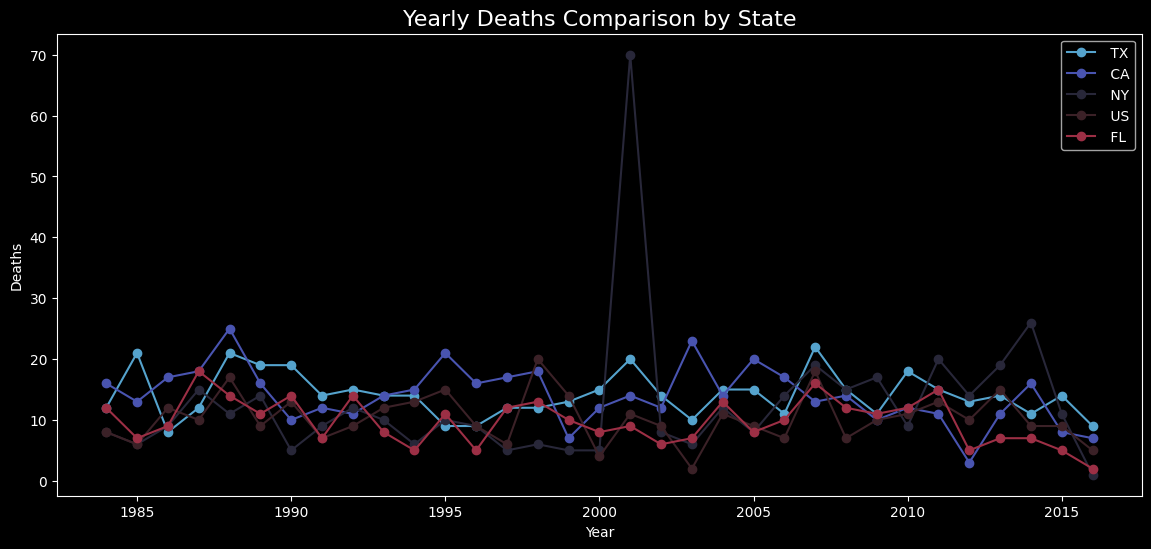

In [8]:
top_states = df_year["state"].value_counts().head(5).index
plt.figure(figsize=(14,6))

for state in top_states:
    state_data = df_year[df_year["state"] == state]
    yearly = state_data.groupby("year").size()
    plt.plot(yearly.index, yearly.values, marker="o", label=state)

plt.title("Yearly Deaths Comparison by State", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.show()


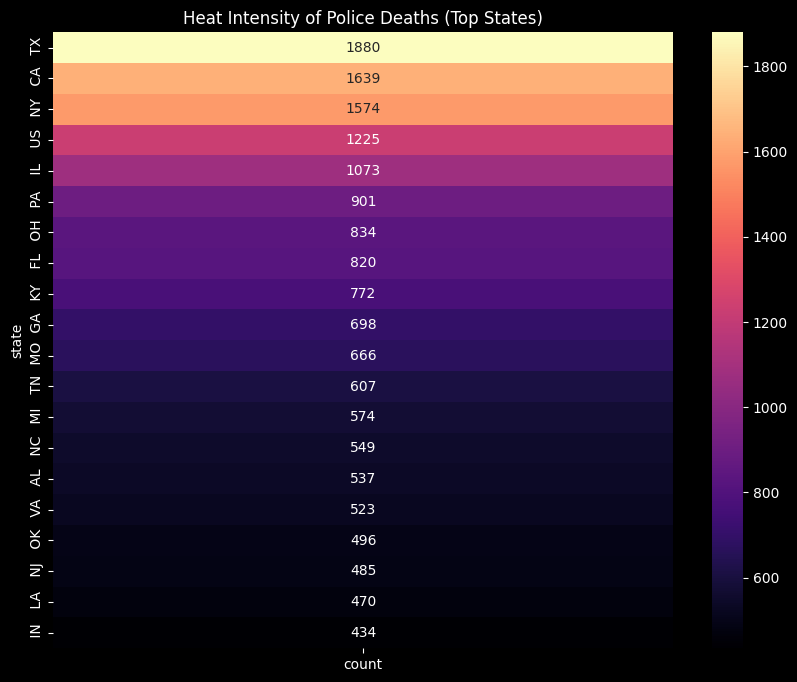

In [10]:
state_deaths = df["state"].value_counts().head(20)

plt.figure(figsize=(10,8))
sns.heatmap(state_deaths.to_frame(), cmap="magma", annot=True, fmt="d")

plt.title("Heat Intensity of Police Deaths (Top States)")
plt.show()



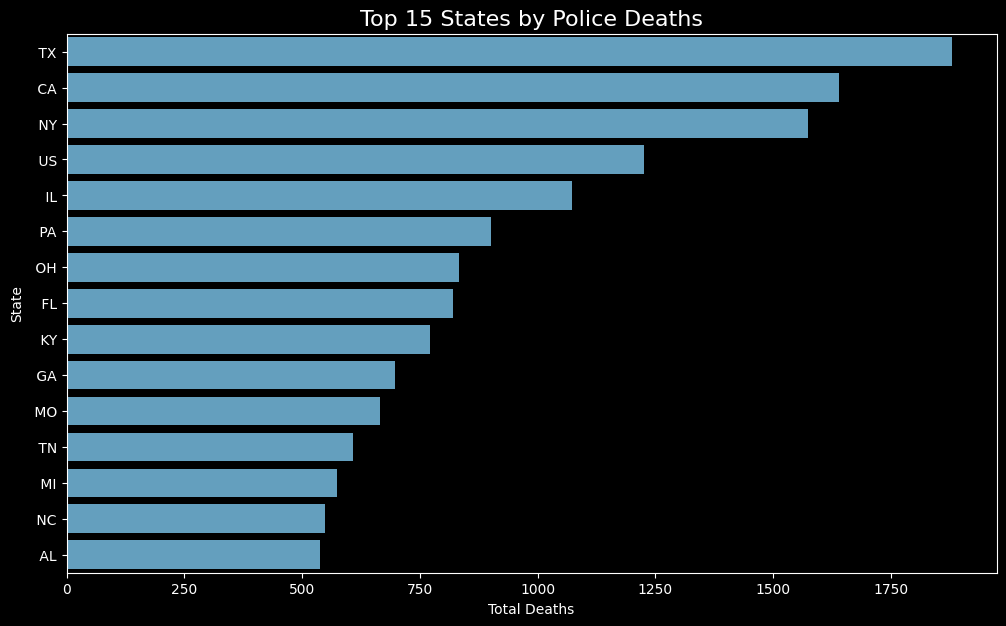

In [18]:

state_counts = df["state"].value_counts().head(15)

plt.figure(figsize=(12,7))
sns.barplot(x=state_counts.values, y=state_counts.index)

plt.title("Top 15 States by Police Deaths", fontsize=16)
plt.xlabel("Total Deaths")
plt.ylabel("State")
plt.show()


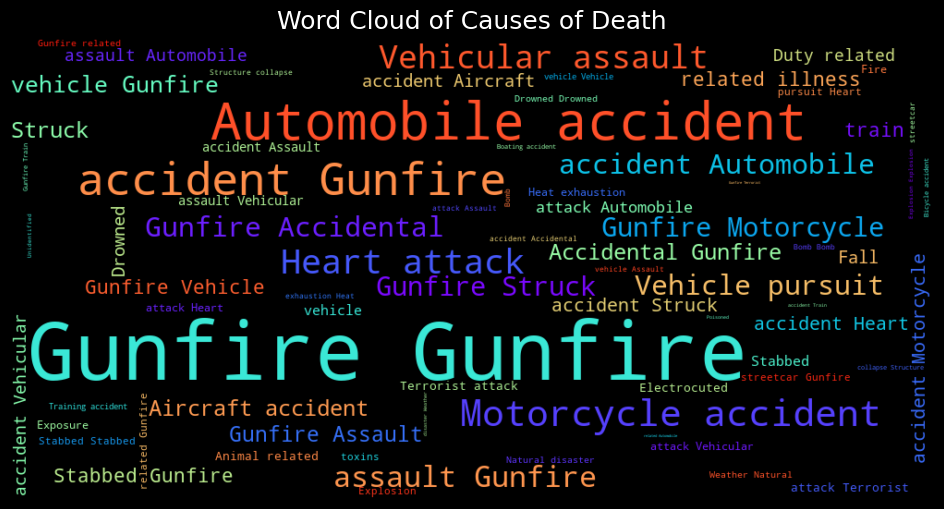

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(
    df["cause"]
    .str.replace("Cause of Death:", "", regex=False)
    .dropna()
)


wc = WordCloud(
    width=1000,
    height=500,
    background_color="black",
    colormap="rainbow",
    max_words=150
)

wc.generate(text)

# Plot
plt.figure(figsize=(14,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Causes of Death", fontsize=18)
plt.show()


In [22]:
ca_shootings = df[(df["state"] == "CA") &(df["cause_short"] == "Gunfire")]

ca_shootings.head()


,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state


In [24]:
import folium
from folium.plugins import MarkerCluster
import random


m = folium.Map(location=[36.7783, -119.4179], zoom_start=6, tiles="CartoDB dark_matter")


marker_cluster = MarkerCluster().add_to(m)


for _, row in ca_shootings.iterrows():

    lat = random.uniform(32.5, 42.0)
    lon = random.uniform(-124.4, -114.1)
    
    folium.Marker(
        location=[lat, lon],
        tooltip=row["person"],   # NAME ON HOVER
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

m


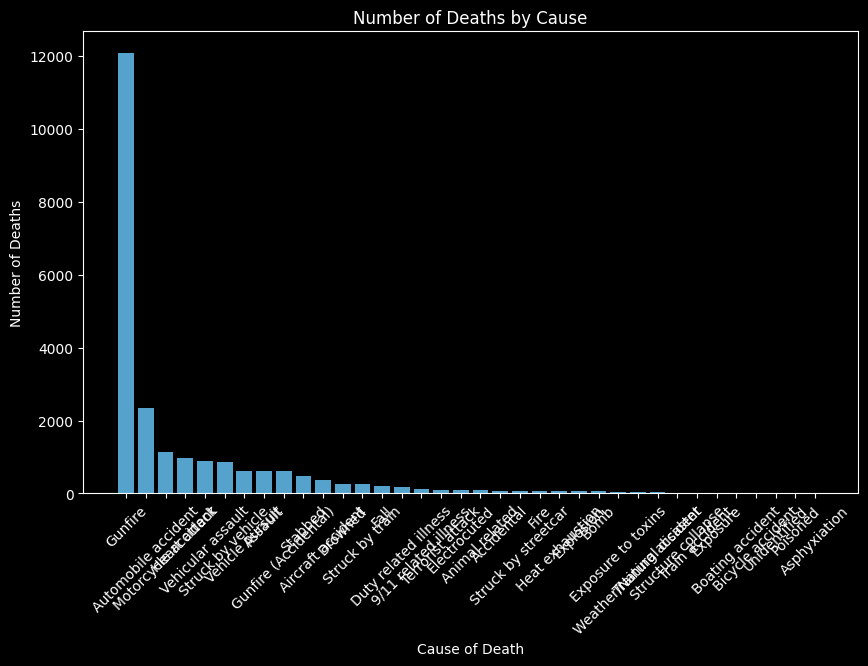

In [27]:
cause_counts = df["cause_short"].value_counts()
plt.figure(figsize=(10,6))
plt.bar(cause_counts.index, cause_counts.values)

plt.title("Number of Deaths by Cause")
plt.xlabel("Cause of Death")
plt.ylabel("Number of Deaths")

plt.xticks(rotation=45)
plt.show()


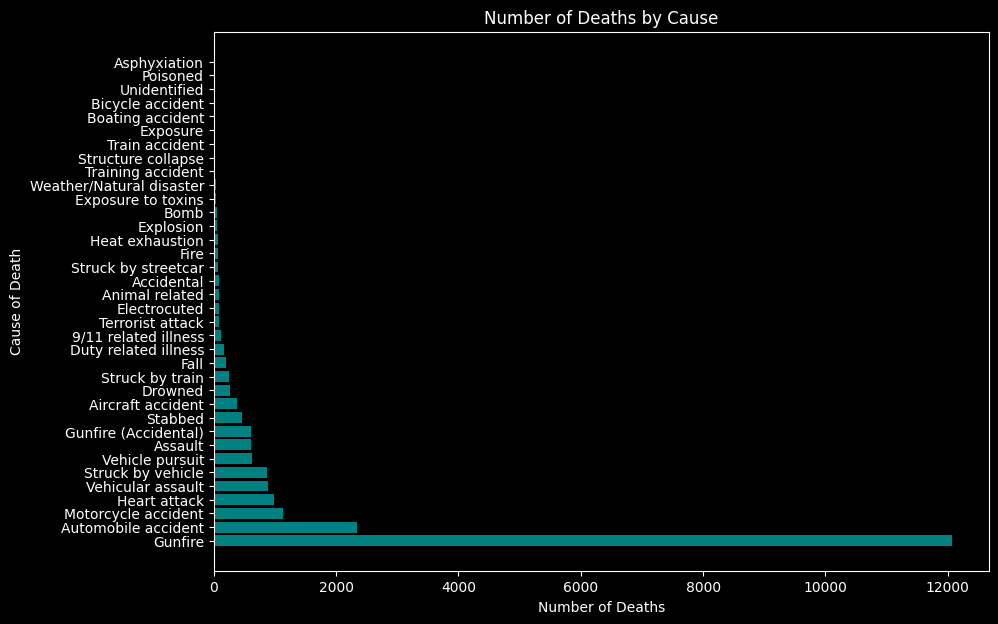

In [28]:
cause_counts = df["cause_short"].value_counts()

plt.figure(figsize=(10,7))
plt.barh(cause_counts.index, cause_counts.values, color="teal")

plt.title("Number of Deaths by Cause")
plt.xlabel("Number of Deaths")
plt.ylabel("Cause of Death")

plt.show()


# above we can see two graph are same but due to glitch in name i rotate the bar graph

In [31]:
# Create pivot table: state vs year
heatmap_data = df.pivot_table(
    index="state",
    columns="year",
    values="person",
    aggfunc="count"
)


In [33]:
top_states = df["state"].value_counts().head(15).index
heatmap_data = heatmap_data.loc[top_states]


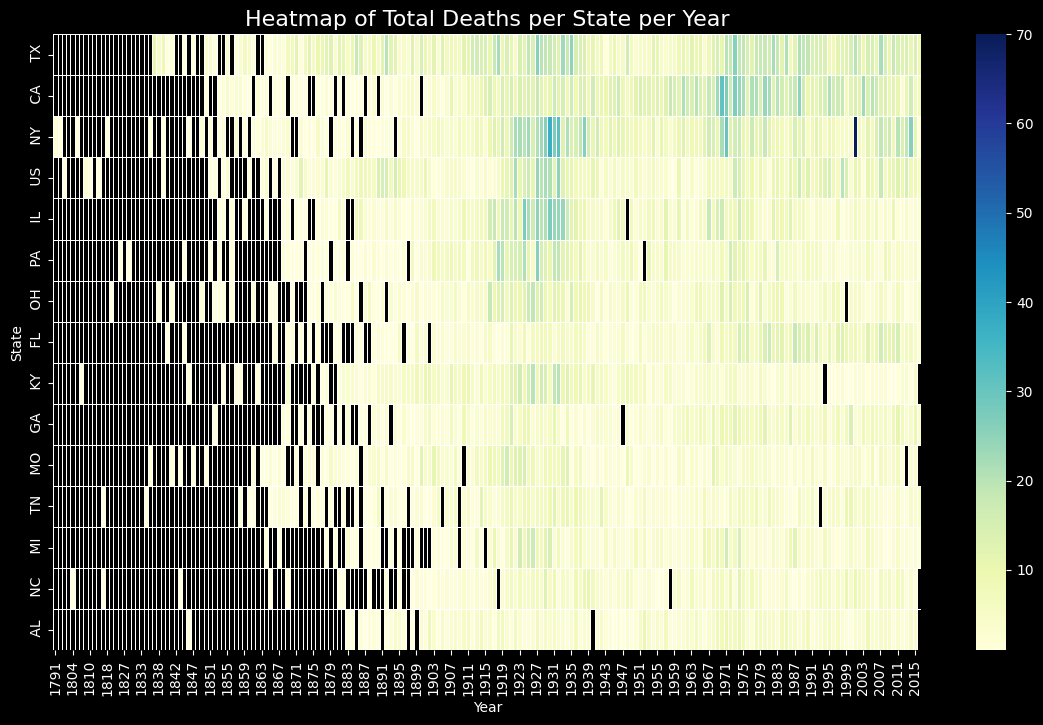

In [35]:
plt.figure(figsize=(14,8))

sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Heatmap of Total Deaths per State per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("State")

plt.show()


In [38]:
tree_data = (df.groupby(["state", "dept_name", "cause_short"]).size() .reset_index(name="deaths"))
